#Adjustment for Income Outliers

In [44]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani

In [45]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


###Establish Necessary Columns and Graph Format

In [122]:
survey['incomefreq'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
survey['log_incomefreq'] = np.log10(survey['incomefreq'])

###Adjust Income Values Less than 10000 by Multiplying by 1000 and Plot vs Non-Adjusted Data Set

/Applications/anaconda/envs/sotolab/lib/python3.4/site-packages/IPython/kernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


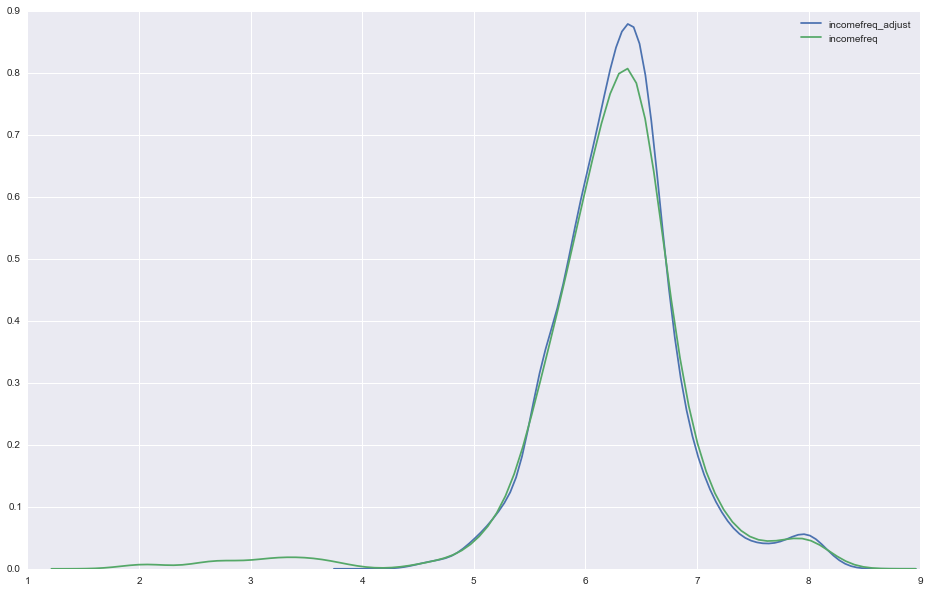

In [125]:
temp_survey3 = survey[survey['incomefreq'] > 0]

def adjust_income(item):
    if item['incomefreq'] <= 10000:
        return item['incomefreq'] * 1000
    else:
        return item['incomefreq']
        
temp_survey3['incomefreq_adjust'] = temp_survey3.apply(adjust_income, axis=1)
graph = sns.kdeplot(data=np.log10(temp_survey3['incomefreq_adjust'].dropna()))
sns.kdeplot(data=np.log10(temp_survey3['incomefreq'].dropna())) #In green

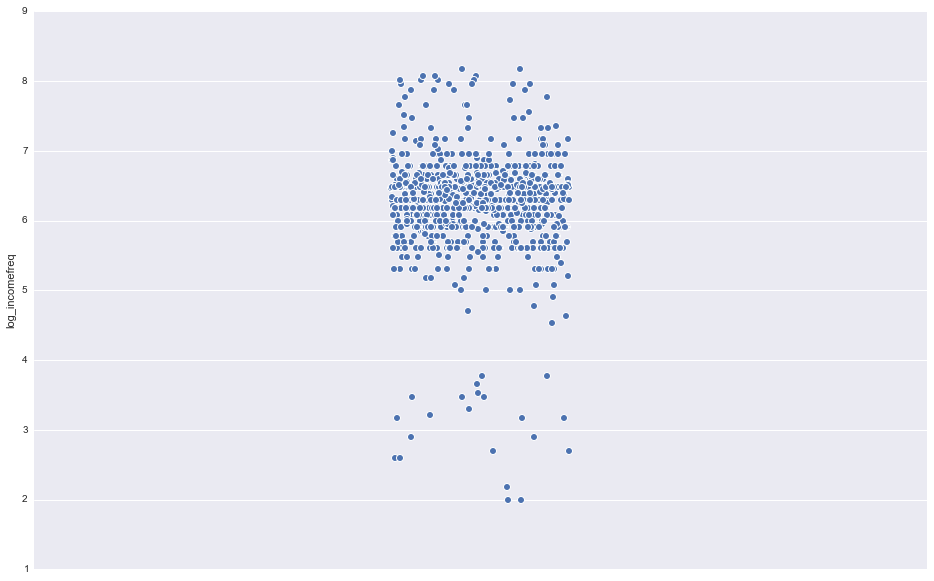

In [133]:
#Non-adjusted - contains outliers
sns.stripplot(x = None, y = 'log_incomefreq', data=temp_survey3,jitter=True)

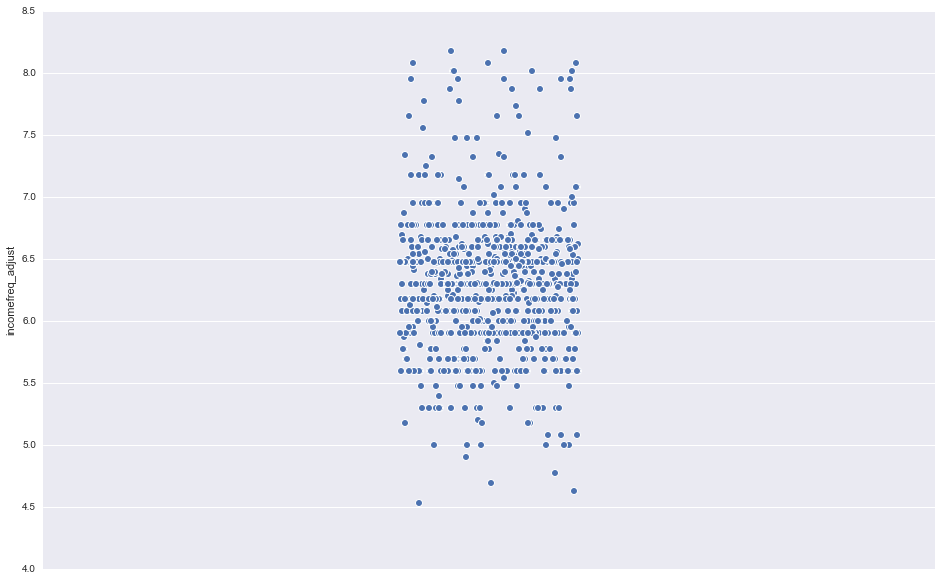

In [134]:
#Adjusted - does not contain outliers
sns.stripplot(x = None, y = np.log10(temp_survey3['incomefreq_adjust']), data=temp_survey3,jitter=True)

###Graphs of Adjusted Income by Demand Point (Demonstrates that heigher incomes are earned by those in the 'other' category - businesses?)

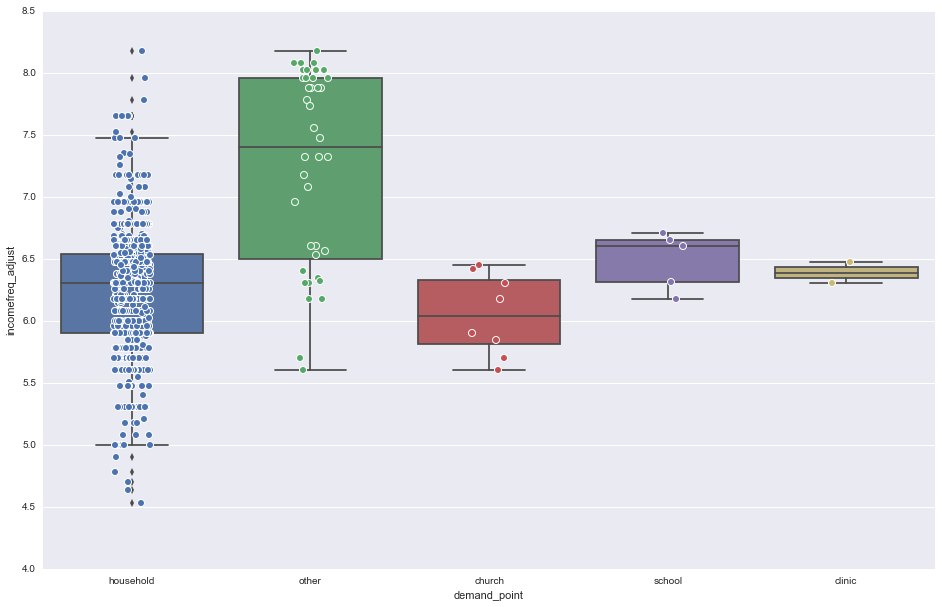

In [128]:
sns.boxplot(x='demand_point',y=np.log10(temp_survey3['incomefreq_adjust']),data=temp_survey3)
sns.stripplot(x='demand_point',y=np.log10(temp_survey3['incomefreq_adjust']),data=temp_survey3,jitter=True)

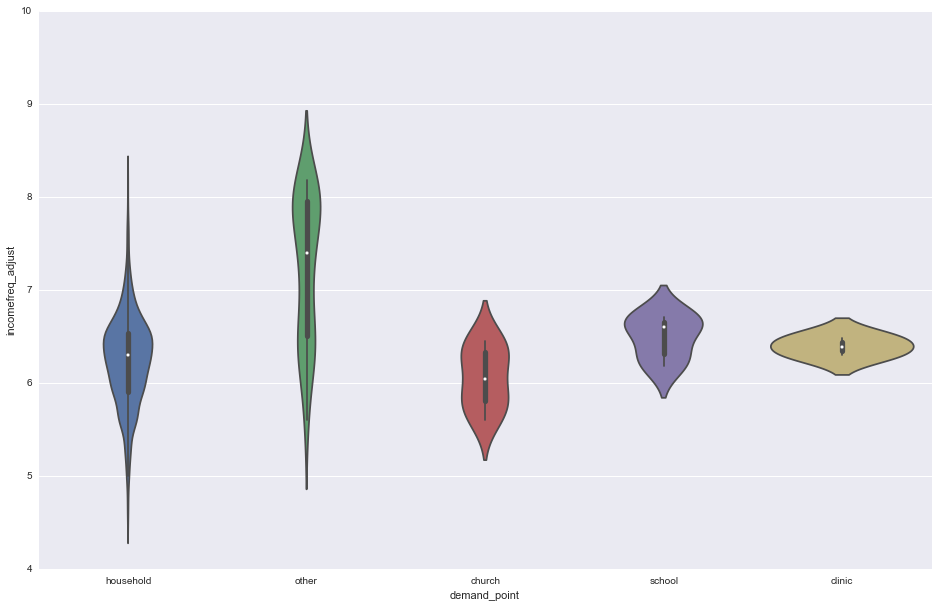

In [132]:
sns.violinplot(x='demand_point',y=np.log10(temp_survey3['incomefreq_adjust']),data=temp_survey3)